# Progetto Analisi di dati
#### Chiara Bettini Eleonora Rossi

## Indice

1. [Statistica descrittiva](#descr) 1
    1. [Analisi di età, numero di fratelli/sposi, numero di genitori/figli, prezzo](#analisi) 1.1
    2. [Distribuzione di femmine e maschi](#fem_masc_perc) 1.2
    3. [Distribuzione passeggeri per classe](#pass_class) 1.3
    4. [Distribuzione passeggeri con cabina](#pass_cab) 1.4
    5. [Distribuzione sopravissuti e non](#sopravvissuti) 1.5
    6. [Distribuzione di sopravvissuti per classe](#sop_class) 1.6
    7. [Distribuzione di non sopravvissuti per classe](#non_sop_class) 1.7
    8. [Distribuzione di sopravvissuti e non per classe](#sopr_non_sopr_class) 1.8
    9. [Distribuzione del sesso tra sopravvissuti e non](#sesso_sopr) 1.9
    10. [Distribuzione di passeggeri per età](#eta) 1.10
    11. [Distribuzione delle età tra sopravvissuti e non](#eta_sopr) 1.11
    12. [Distribuzione delle età per classe e sesso](#eta_cla_sex) 1.12
    13. [Distribuzione cabine per classe](#cab_cla) 1.13
    14. [Distribuzione del luogo di imbarco](#imbar) 1.14
    15. [Distribuzione età per luogo di imbarco](#eta_imbar) 1.15
    16. [Distribuzione del luogo di imbarco per classe](#cla_imbar) 1.16
    17. [Distribuzione dei passeggeri sopravvissuti e morti in base al luogo di imbarco](#sopr_imbar) 1.17
    18. [Distribuzione fratelli/sposi](#sibsp) 1.18
    19. [Distribuzione del numero di fratelli/sposi di chi ce li ha](#sibsp_num) 1.19
    20. [Distribuzione del numero di fratelli/sposi per classe](#sibsp_cla) 1.20
    21. [Distribuzione di genitori/figli](#parch) 1.21
    22. [Distribuzione del numero di genitori/figli dei passeggeri](#parch_num) 1.22
    23. [Distribuzione del prezzo del biglietto per classe](#fare_class) 1.23
    24. [Distribuzione del prezzo del biglietto per numero di fratelli/sposi](#fare_sibsp) 1.24
    25. [Distribuzione del prezzo del biglietto per numero di genitori/figli](#fare_parch) 1.25
    26. [Numero di persone per cabina in base alla classe](#pers_cab) 1.26
2. [Correlazioni](#correlazioni) 2
    1. [Pulizia del dataset](#pulizia) 2.1
    2. [Analisi correlazione](#analisi_corr) 2.2
          1. [Pairplot](#pairplot) 2.2.1
          2. [Heatmap](#heat) 2.2.2
    3. [Analisi correlazione con gestione outliers](#corr_out) 2.3
          1. [Gestione outliers](#outliers) 2.3.1
          2. [Correlazione omettendo gli outliers](#corr_out1) 2.3.2
    4. [Distribuzione di fratelli/sposi per genitori/figli](#sibsp_parch) 2.4
    5. [Analisi di correlazione tra classe e sopravvissuti includendo valori nulli per 'Age'](#class_surv_corr) 2.5
    
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# grafici
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale = 1.5, rc={'font.size': 18, 'axes.titlesize': 18, 'axes.labelsize':18})
plt.rcParams["figure.figsize"] = [13,7]

In [3]:
df = pd.read_csv('train.csv', encoding = 'utf-8')

In [4]:
df.shape

(891, 12)

In [5]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


-----------------------------------

# Statistica descrittiva <a name="descr"></a>

## Analisi di età, numero di fratelli/sposi, numero di genitori/figli, prezzo <a name="analisi"></a>

In [8]:
df_describe = df.describe()
df_describe.drop(['PassengerId', 'Survived', 'Pclass'], axis = 1, inplace = True)

In [9]:
df_describe

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [10]:
print('La varianza dell\'età è '+str(round(df['Age'].var(),3)))
print('La varianza del numero di fratelli/sposi è '+str(round(df['SibSp'].var(),3)))
print('La varianza del numero di genitori/figli è '+str(round(df['Parch'].var(),3)))
print('La varianza del costo del biglietto è '+str(round(df['Fare'].var(),3)))

La varianza dell'età è 211.019
La varianza del numero di fratelli/sposi è 1.216
La varianza del numero di genitori/figli è 0.65
La varianza del costo del biglietto è 2469.437


In [11]:
print('La mean absolute deviation dell\'età è '+str(round(df['Age'].mad(),3)))
print('La mean absolute deviation del numero di fratelli/sposi è '+str(round(df['SibSp'].mad(),3)))
print('La mean absolute deviation del numero di genitori/figli è '+str(round(df['Parch'].mad(),3)))
print('La mean absolute deviation del costo del biglietto è '+str(round(df['Fare'].mad(),3)))

La mean absolute deviation dell'età è 11.323
La mean absolute deviation del numero di fratelli/sposi è 0.714
La mean absolute deviation del numero di genitori/figli è 0.581
La mean absolute deviation del costo del biglietto è 28.164


## Distribuzione di femmine e maschi <a name='fem_masc_perc'></a>

In [12]:
dati_sesso_m = df[df['Sex'] == 'male'].shape[0]
dati_sesso_m

577

In [13]:
dati_sesso_f = df[df['Sex'] == 'female'].shape[0]
dati_sesso_f

314

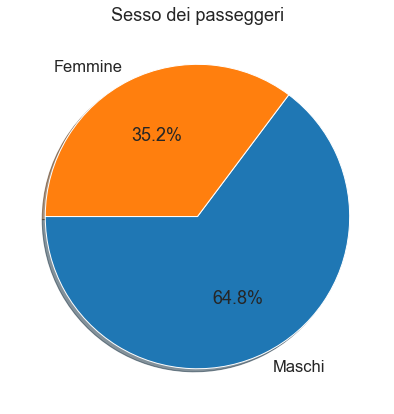

In [14]:
# divisione uomini e donne

labels = ['Maschi', 'Femmine']
sizes = [dati_sesso_m, dati_sesso_f]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%',  shadow = True, startangle = 180)
plt.title('Sesso dei passeggeri')
plt.show()

## Distribuzione passeggeri per classe <a name='pass_class'></a>

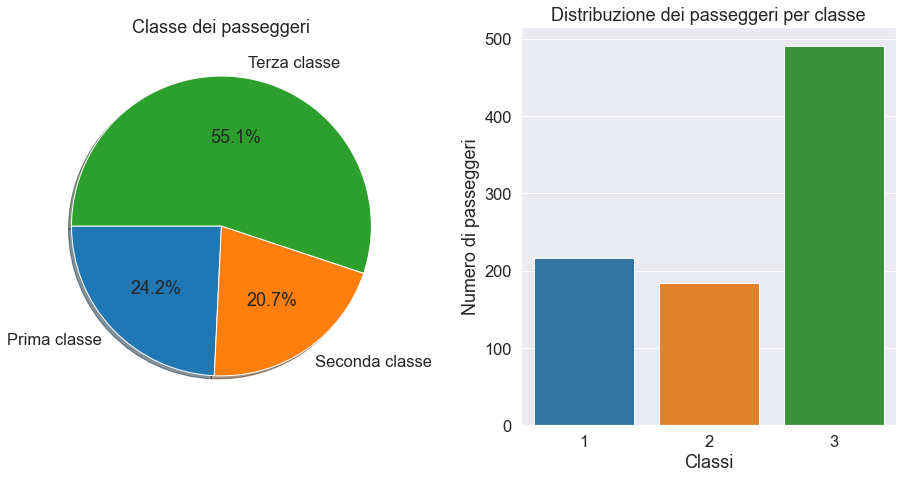

In [107]:
# classe passeggeri
plt.subplot(1,2,1)
labels = ['Prima classe', 'Seconda classe', 'Terza classe']
sizes = [df[df['Pclass'] == 1].shape[0], df[df['Pclass'] == 2].shape[0], df[df['Pclass'] == 3].shape[0]]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Classe dei passeggeri')

plt.subplot(1,2,2)
sns.countplot(x = 'Pclass', data = df)
plt.xlabel("Classi")
plt.ylabel("Numero di passeggeri")
plt.title('Distribuzione dei passeggeri per classe')

plt.tight_layout()
plt.show()


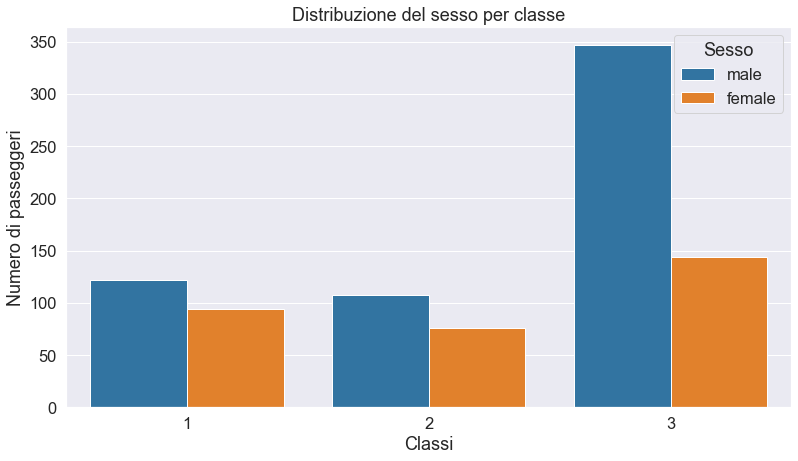

In [111]:
sns.countplot(x = 'Pclass', hue = 'Sex', data = df)
plt.xlabel("Classi")
plt.ylabel("Numero di passeggeri")
plt.title('Distribuzione del sesso per classe')
plt.legend(["Maschi", "Femmine"])
plt.legend().set_title('Sesso')
plt.show()

## Distribuzione passeggeri con cabina <a name='pass_cab'></a>

Necessario capire se i valori NaN corrispondono a passeggeri senza cabina oppure a valori sconosciuti

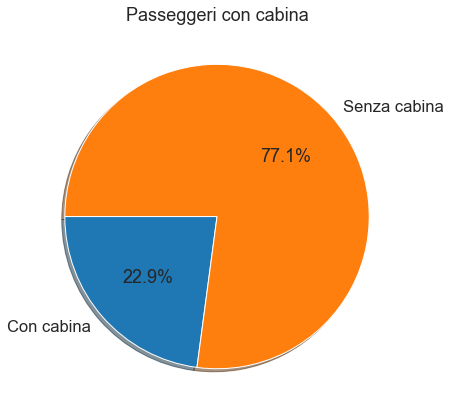

In [16]:
# quanti avevano la cabina
labels = ['Con cabina', 'Senza cabina']
sizes = [df[df['Cabin'].notnull()].shape[0], df[df['Cabin'].isnull()].shape[0]]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Passeggeri con cabina')
plt.show()

## Distribuzione sopravissuti e non <a name='sopravvissuti'></a>

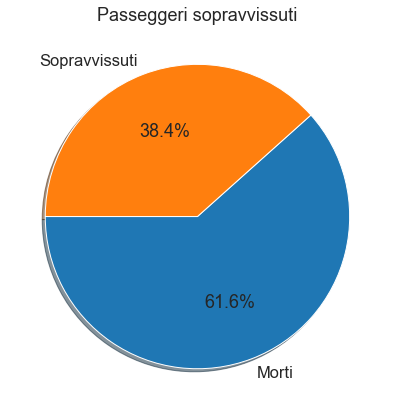

In [17]:
# percentuale sopravvissuti
labels = ['Morti', 'Sopravvissuti']
sizes = [df[df['Survived'] == 0].shape[0], df[df['Survived'] == 1].shape[0]]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Passeggeri sopravvissuti')
plt.show()

## Distribuzione di sopravvissuti per classe <a name='sop_class'></a>

In [18]:
#dataframe di sopravvissuti per ogni classe
df_surv_cl_1 = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 1)]

df_surv_cl_2 = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 2)]

df_surv_cl_3 = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 3)]

df_surv_cl_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


In [19]:
#Unione dataframes precedenti in unico dataframe
df_survived_per_cl = pd.concat([df_surv_cl_1, df_surv_cl_2, df_surv_cl_3])
df_survived_per_cl.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


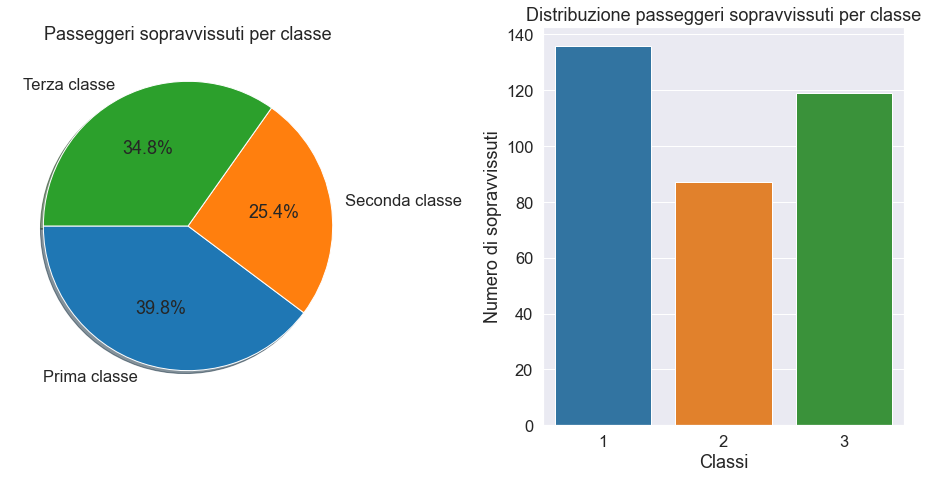

In [104]:
#percentuale sopravvissuti per classe
plt.subplot(1,2,1)
labels = ['Prima classe', 'Seconda classe', 'Terza classe']
sizes = [df_surv_cl_1.shape[0], df_surv_cl_2.shape[0], df_surv_cl_3.shape[0]]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Passeggeri sopravvissuti per classe')

plt.subplot(1,2,2)
sns.countplot(x = 'Pclass', data = df_survived_per_cl)
plt.title('Distribuzione passeggeri sopravvissuti per classe')
plt.xlabel("Classi")
plt.ylabel("Numero di sopravvissuti")

plt.tight_layout()
plt.show()

## Distribuzione di non sopravvissuti per classe <a name='non_sop_class'></a>

In [21]:
#dataframe di sopravvissuti per ogni classe
df_not_surv_cl_1 = df.loc[(df['Survived'] == 0) & (df['Pclass'] == 1)]

df_not_surv_cl_2 = df.loc[(df['Survived'] == 0) & (df['Pclass'] == 2)]

df_not_surv_cl_3 = df.loc[(df['Survived'] == 0) & (df['Pclass'] == 3)]

df_not_surv_cl_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


In [22]:
#Unione dataframes precedenti in unico dataframe
df_not_survived_per_cl = pd.concat([df_not_surv_cl_1, df_not_surv_cl_2, df_not_surv_cl_3])
df_not_survived_per_cl.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


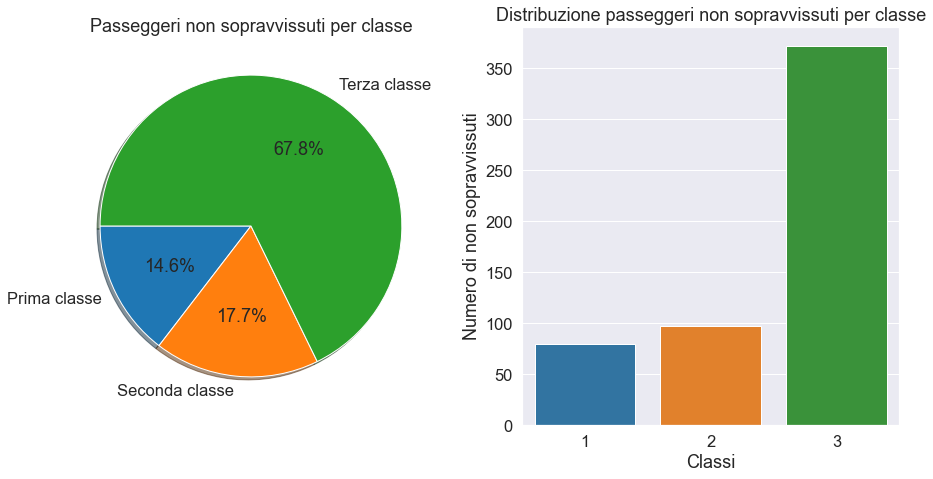

In [103]:
#percentuale sopravvissuti per classe
plt.subplot(1,2,1)
labels = ['Prima classe', 'Seconda classe', 'Terza classe']
sizes = [df_not_surv_cl_1.shape[0], df_not_surv_cl_2.shape[0], df_not_surv_cl_3.shape[0]]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Passeggeri non sopravvissuti per classe')

plt.subplot(1,2,2)
sns.countplot(x = 'Pclass', data = df_not_survived_per_cl)
plt.title('Distribuzione passeggeri non sopravvissuti per classe')
plt.xlabel("Classi")
plt.ylabel("Numero di non sopravvissuti")

plt.tight_layout()
plt.show()

## Distribuzione di sopravvissuti e non per classe <a name='sopr_non_sopr_class'></a>

In [24]:
df_surv_class = pd.crosstab(df['Pclass'], df['Survived'], values = df['PassengerId'], aggfunc = lambda x: len(x))
df_surv_class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


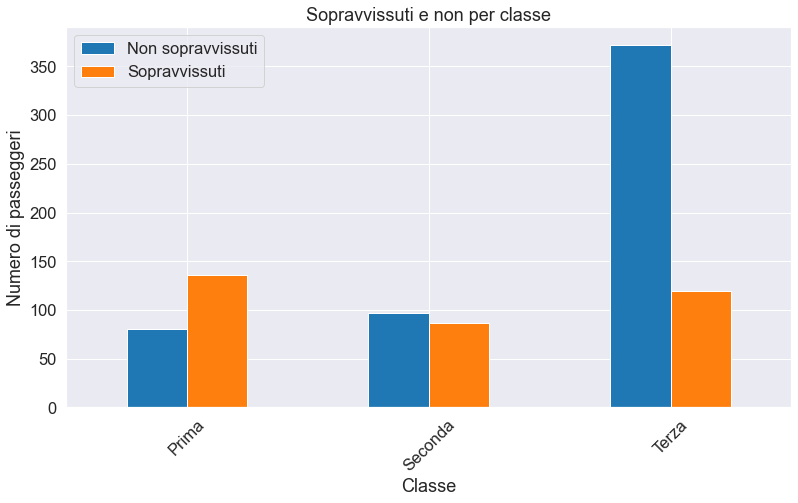

In [25]:
# classe delle persone sopravvissute e non
df_surv_class.plot(kind="bar", stacked=False)
plt.legend(["Non sopravvissuti", "Sopravvissuti"])
plt.xticks([0,1,2], ["Prima", "Seconda", "Terza"], rotation = 45)
plt.title('Sopravvissuti e non per classe')
plt.xlabel("Classe")
plt.ylabel("Numero di passeggeri")
plt.show()

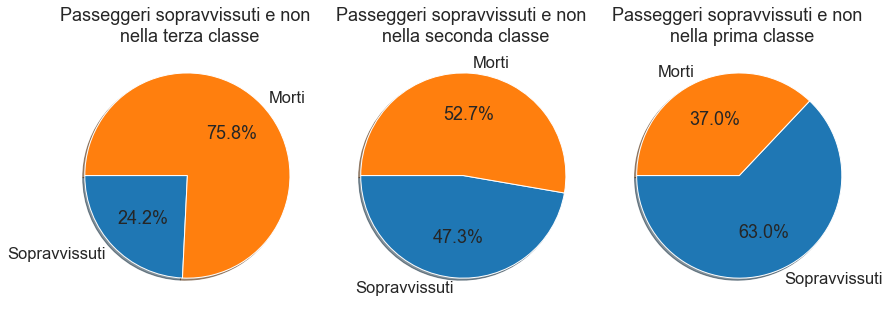

In [112]:
#percentuale sopravvissuti per terza classe
plt.subplot(1,3,1)
labels = ['Sopravvissuti', 'Morti']
sizes = [df.loc[(df['Survived'] == 1) & (df['Pclass'] == 3)].shape[0], df.loc[(df['Survived'] == 0) & (df['Pclass'] == 3)].shape[0]]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Passeggeri sopravvissuti e non \n nella terza classe')

#percentuale sopravvissuti per seconda classe
plt.subplot(1,3,2)
labels = ['Sopravvissuti', 'Morti']
sizes = [df.loc[(df['Survived'] == 1) & (df['Pclass'] == 2)].shape[0], df.loc[(df['Survived'] == 0) & (df['Pclass'] == 2)].shape[0]]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Passeggeri sopravvissuti e non \n nella seconda classe')

#percentuale sopravvissuti per prima classe
plt.subplot(1,3,3)
labels = ['Sopravvissuti', 'Morti']
sizes = [df.loc[(df['Survived'] == 1) & (df['Pclass'] == 1)].shape[0], df.loc[(df['Survived'] == 0) & (df['Pclass'] == 1)].shape[0]]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Passeggeri sopravvissuti e non \n nella prima classe')

plt.tight_layout()
plt.show()

## Distribuzione del sesso tra sopravvissuti e non <a name='sesso_sopr'></a>

In [26]:
df_surv_sex = pd.crosstab(df['Sex'], df['Survived'], values = df['PassengerId'], aggfunc = lambda x: len(x))
df_surv_sex

Survived,0,1
Sex,,
female,81,233
male,468,109


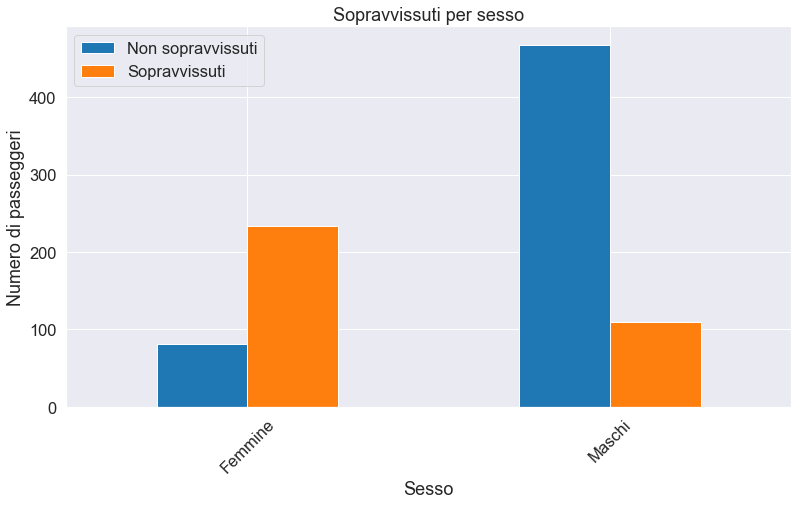

In [27]:
# sesso delle persone sopravvissute e non
df_surv_sex.plot(kind="bar", stacked=False)
plt.legend(["Non sopravvissuti", "Sopravvissuti"])
plt.xticks([0,1], ["Femmine", "Maschi"], rotation = 45)
plt.title('Sopravvissuti per sesso')
plt.xlabel("Sesso")
plt.ylabel("Numero di passeggeri")
plt.show()

## Distribuzione di passeggeri per età <a name='eta'></a>

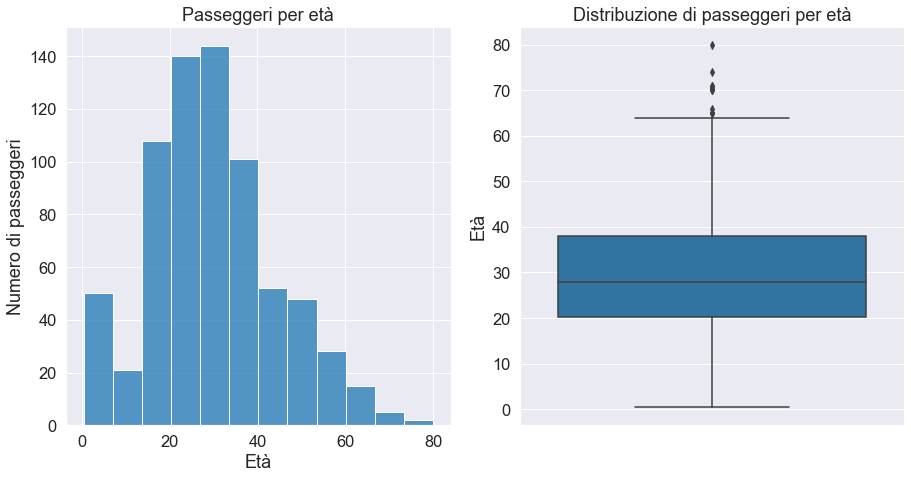

In [28]:
plt.subplot(1,2,1)
sns.histplot(x = 'Age', data = df, bins = 12)
plt.xticks([0,20,40,60,80])
plt.title('Passeggeri per età')
plt.xlabel("Età")
plt.ylabel("Numero di passeggeri")

plt.subplot(1,2,2)
sns.boxplot(y = 'Age', data = df)
plt.title('Distribuzione di passeggeri per età')
plt.ylabel("Età")

plt.tight_layout()
plt.show()

## Distribuzione delle età tra sopravvissuti e non <a name='eta_sopr'></a>

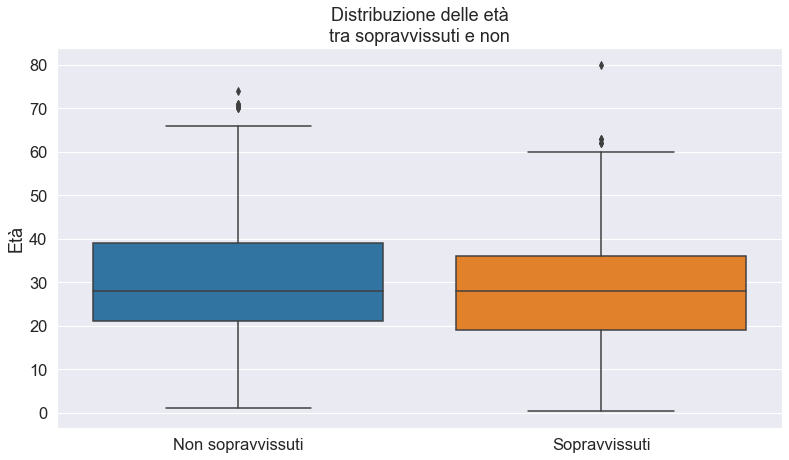

In [29]:
sns.boxplot(x = 'Survived', y = 'Age', data = df)
plt.xticks([0, 1], ['Non sopravvissuti', 'Sopravvissuti'])
plt.title('Distribuzione delle età\ntra sopravvissuti e non')
plt.xlabel("")
plt.ylabel("Età")
plt.show()

In [30]:
print('Passeggeri di cui non si conosce l\'età:')
df[df['Age'].isnull()].shape[0]

Passeggeri di cui non si conosce l'età:


177

Analisi descrittiva dei dati:

In [31]:
# sopravvissuti

df[df['Survived']==1].Age.describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [32]:
# non sopravvissuti

df[df['Survived']==0].Age.describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

## Distribuzione delle età per classe e sesso <a name='eta_cla_sex'></a>

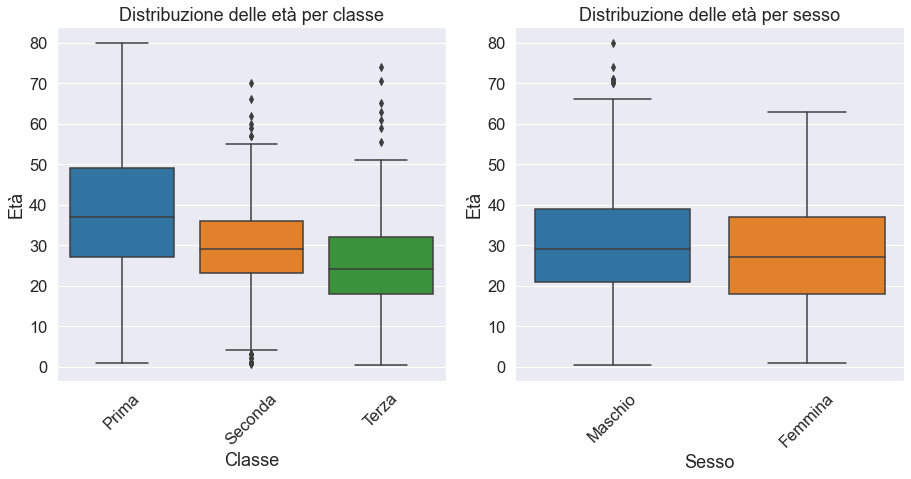

In [33]:
# età delle persone imbarcate

plt.subplot(1,2,1)
sns.boxplot(x = 'Pclass', y = 'Age', data = df)
plt.title('Distribuzione delle età per classe')
plt.xlabel('Classe')
plt.ylabel('Età')
plt.xticks([0, 1, 2], ['Prima', 'Seconda', 'Terza'],rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(x = 'Sex', y = 'Age', data = df)
plt.title('Distribuzione delle età per sesso')
plt.xlabel('Sesso')
plt.ylabel("Età")
plt.xticks([0, 1], ['Maschio', 'Femmina'],rotation = 45)

plt.tight_layout()
plt.show()

Analisi dei dati:

Per classe:

In [34]:
# prima classe
df[df['Pclass']==1].Age.describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
# seconda classe
df[df['Pclass']==2].Age.describe()

count    173.000000
mean      29.877630
std       14.001077
min        0.670000
25%       23.000000
50%       29.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64

In [36]:
# terza classe
df[df['Pclass']==3].Age.describe()

count    355.000000
mean      25.140620
std       12.495398
min        0.420000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64

Per sesso:

In [37]:
# femmine 
df[df['Sex']=='female'].Age.describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

In [38]:
# maschi 
df[df['Sex']=='male'].Age.describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

## Distribuzione cabine per classe <a name='cab_cla'></a>

In [39]:
# creato un dataset in cui se risultava che il passeggero avesse una cabina il valore era True, altrimenti False

df_bool_cabin=pd.read_csv('train.csv', encoding = 'utf-8')

df_bool_cabin['Cabin']=df_bool_cabin['Cabin'].fillna(False)

for elem in df_bool_cabin['Cabin']:
    if elem != False:
        df_bool_cabin['Cabin']=df_bool_cabin['Cabin'].replace(str(elem),True)

print(df_bool_cabin[df_bool_cabin['Cabin']==True].shape[0])
df_bool_cabin.head()

204


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,False,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,True,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,False,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,True,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,False,S


C'è però un aspetto che va considerato nel valutare i dati sulle cabine: non ci è dato sapere se i NaN nel dataset per la variabile "Cabin" fossero una mancanza di informazione o se effettivamente denotassero il fatto che i passeggeri non avevano una cabina.

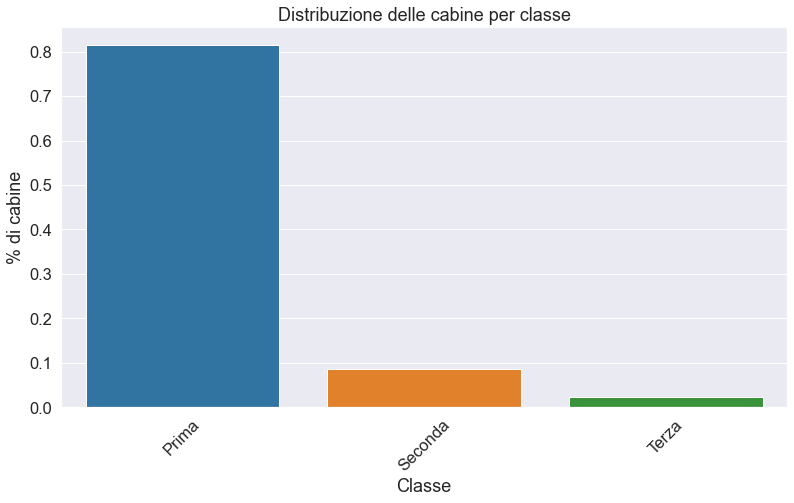

In [40]:
sns.barplot(x = 'Pclass', y = 'Cabin', data = df_bool_cabin, ci = None)
plt.title('Distribuzione delle cabine per classe')
plt.xlabel('Classe')
plt.ylabel('% di cabine')
plt.xticks([0,1,2], ['Prima', 'Seconda', 'Terza'], rotation = 45)
plt.show()

## Distribuzione del luogo di imbarco <a name='imbar'></a>

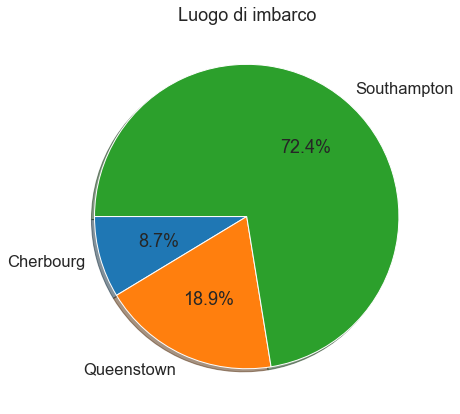

In [41]:
# divisione luogo di imbarco
labels = ['Cherbourg', 'Queenstown', 'Southampton']
C = df[df['Embarked']=='C'].shape[0]
Q = df[df['Embarked']=='Q'].shape[0]
S = df[df['Embarked']=='S'].shape[0]
sizes = [Q,C,S]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', startangle = 180, shadow = True)
plt.title('Luogo di imbarco')
plt.show()

## Distribuzione età per luogo di imbarco <a name='eta_imbar'></a>

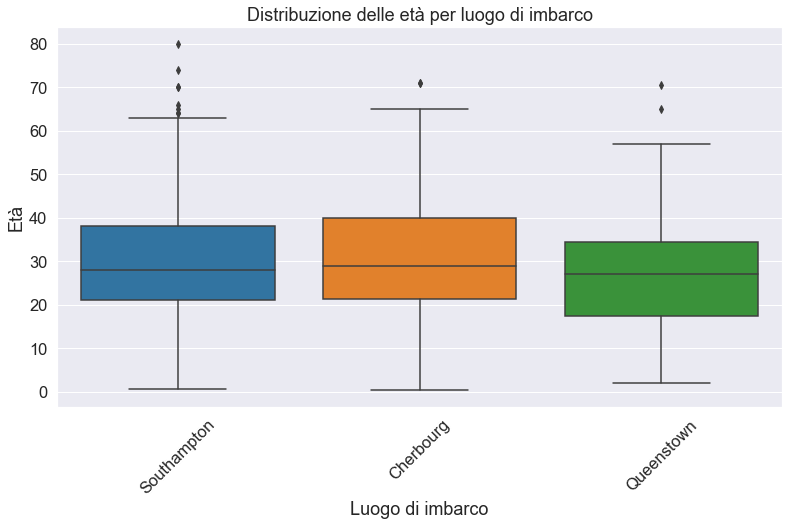

In [42]:
# età delle persone imbarcate, classe, sopravvissuti
sns.boxplot(x = 'Embarked', y = 'Age', data = df)
plt.title('Distribuzione delle età per luogo di imbarco')
plt.xticks([0,1,2], ['Southampton', 'Cherbourg', 'Queenstown'], rotation=45)
plt.xlabel('Luogo di imbarco')
plt.ylabel("Età")
plt.show()

## Distribuzione del luogo di imbarco per classe <a name='cla_imbar'></a>

In [43]:
# calcolo delle persone imbarcate in base a classe e luogo di imbarco
df_imbarco_classe = pd.crosstab(df['Embarked'], df['Pclass'], values = df['PassengerId'], aggfunc = lambda x: len(x))
df_imbarco_classe

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [44]:
# numero di elementi nulli
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


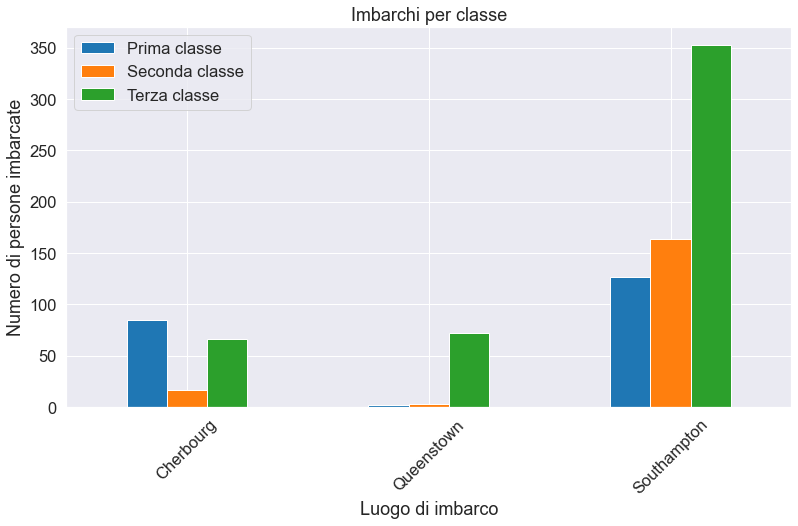

In [45]:
# classe delle persone imbarcate
df_imbarco_classe.plot(kind="bar", stacked=False)
plt.legend(["Prima classe", "Seconda classe", "Terza classe"])
plt.xticks([0,1,2], ["Cherbourg", "Queenstown", "Southampton"], rotation = 45)
plt.title('Imbarchi per classe')
plt.xlabel('Luogo di imbarco')
plt.ylabel('Numero di persone imbarcate')
plt.show()

## Distribuzione dei passeggeri sopravvissuti e morti in base al luogo di imbarco <a name='sopr_imbar'></a>

In [46]:
# calcolo del numero di passeggeri sopravvissuti e morti in base al luogo di imbarco
df_imbarco_vivi = pd.crosstab(df['Embarked'], df['Survived'], values = df['PassengerId'], aggfunc = lambda x: len(x))
df_imbarco_vivi

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


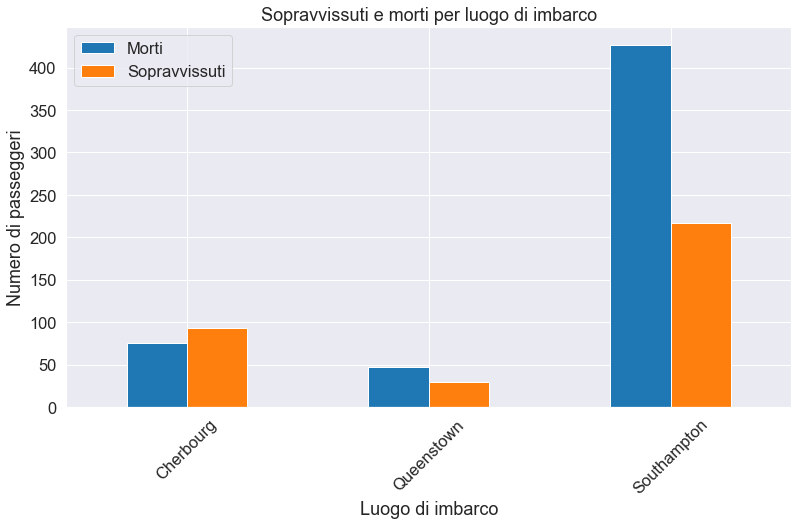

In [47]:
# sopravvissuti e morti per luogo di imbarco
df_imbarco_vivi.plot(kind="bar", stacked=False)
plt.legend(["Morti", "Sopravvissuti"])
plt.xticks([0,1,2], ["Cherbourg", "Queenstown", "Southampton"], rotation = 45)
plt.title('Sopravvissuti e morti per luogo di imbarco')
plt.xlabel('Luogo di imbarco')
plt.ylabel('Numero di passeggeri')
plt.show()

## Distribuzione fratelli/sposi <a name='sibsp'></a>

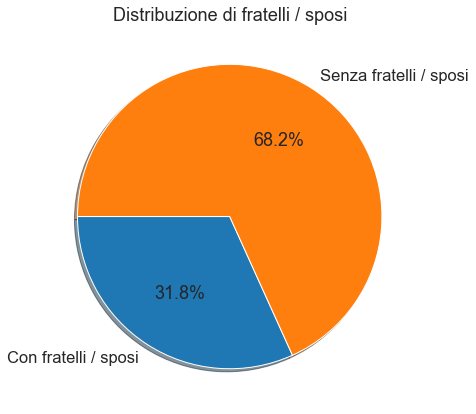

In [48]:
# quanti hanno fratelli o sposi
labels = ['Con fratelli / sposi', 'Senza fratelli / sposi',]
sizes = [df[df['SibSp']> 0].shape[0],df[df['SibSp'] == 0].shape[0]]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Distribuzione di fratelli / sposi')

plt.show()

## Distribuzione del numero di fratelli/sposi di chi ce li ha <a name='sibsp_num'></a>

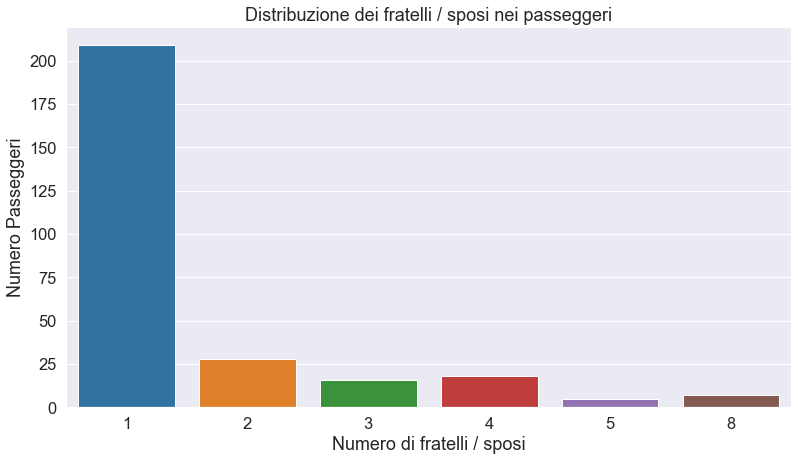

In [49]:
#Distribuzioni di chi ha fratelli/sposi

df_sib = df[df['SibSp'] > 0]
sns.countplot(x = 'SibSp', data = df_sib)
plt.title('Distribuzione dei fratelli / sposi nei passeggeri')
plt.ylabel('Numero Passeggeri')
plt.xlabel('Numero di fratelli / sposi')

plt.show()

## Distribuzione del numero di fratelli/sposi per classe <a name='sibsp_cla'></a>

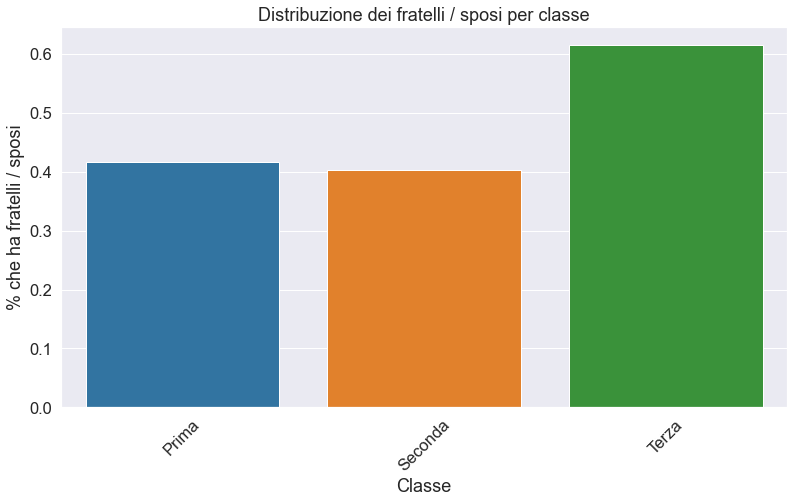

In [50]:
#Distribuzione dei fratelli / sposi per classe
sns.barplot(x = 'Pclass', y="SibSp", data = df, ci= None)
plt.title('Distribuzione dei fratelli / sposi per classe')
plt.ylabel('% che ha fratelli / sposi')
plt.xlabel('Classe')
plt.xticks([0,1,2], ['Prima', 'Seconda', 'Terza'], rotation = 45)

plt.show()

## Distribuzione di genitori/figli <a name='parch'></a>

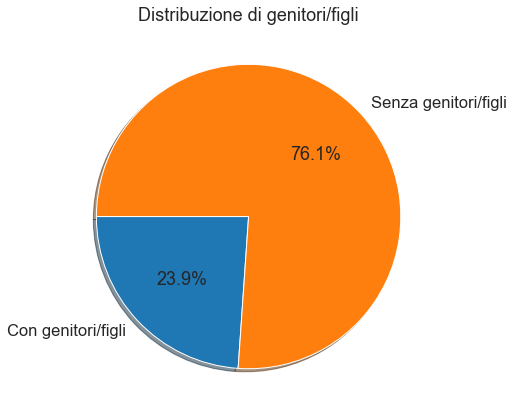

In [51]:
# quanti hanno figli/genitori
labels = ['Con genitori/figli', 'Senza genitori/figli',]
sizes = [df[df['Parch']> 0].shape[0],df[df['Parch'] == 0].shape[0]]
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Distribuzione di genitori/figli')
plt.show()

## Distribuzione del numero di genitori/figli dei passeggeri <a name='parch_num'></a>

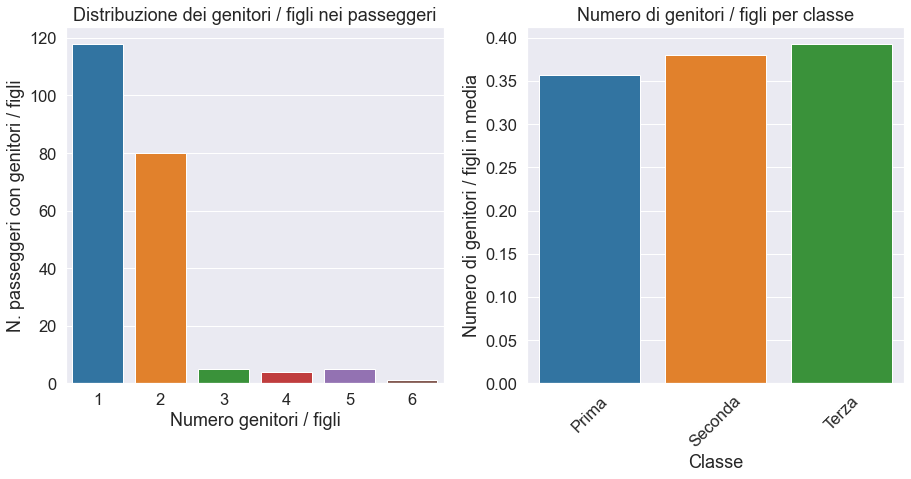

In [124]:
#Distribuzioni di chi ha genitori/figli

#Distribuzione di chi ha i genitori/figli
plt.subplot(1,2,1)
df_parch = df[df['Parch'] > 0]
sns.countplot(x = 'Parch', data = df_parch)
plt.title('Distribuzione dei genitori / figli nei passeggeri')
plt.ylabel('N. passeggeri con genitori / figli')
plt.xlabel('Numero genitori / figli')

#Distribuzione dei genitori/figli per classe
plt.subplot(1,2,2)
sns.barplot(x = 'Pclass', y="Parch", data = df, ci= None)
plt.title('Numero di genitori / figli per classe')
plt.ylabel('Numero di genitori / figli in media')
plt.xlabel('Classe')
plt.xticks([0,1,2], ['Prima', 'Seconda', 'Terza'], rotation = 45)

plt.tight_layout()
plt.show()

## Distribuzione del prezzo del biglietto per classe <a name='fare_class'></a>

Analizzando i dati grezzi ci siamo resi conto che i biglietti non erano univoci.

In [53]:
df['Ticket'].nunique()

681

Osservando i dati del prezzo abbiamo notato che uguale biglietto corrispondeva ad uguale prezzo:

In [54]:
# dizionario con i biglietti unici e il numero di volte che appaiono
v = df.Ticket.value_counts()

# dataframe con biglietti che si sono ripetuti più volte nel dataset originale
df_multi_ticket = df[df.Ticket.isin(v.index[v.gt(1)])]

In [55]:
df_multi_ticket[df_multi_ticket['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [56]:
# dizionario con i biglietti unici che appaiono più volte nel dataset
multiple_tickets = {}
for key, value in v.items():
    if value > 1:
        multiple_tickets[key]=value

In [57]:
diff_fare = []
for ticket in multiple_tickets.keys():
    fare = df_multi_ticket[df_multi_ticket['Ticket']==ticket].Fare
    check = fare.nunique()
    if (check!=1):
        print('Biglietto in cui non coincide il prezzo:',ticket)
        diff_fare.append(ticket)

print()
for ticket in diff_fare:
    print(df_multi_ticket[df_multi_ticket['Ticket']==ticket].iloc[:, 0:4])

Biglietto in cui non coincide il prezzo: 7534

     PassengerId  Survived  Pclass                           Name
138          139         0       3            Osen, Mr. Olaf Elon
876          877         0       3  Gustafsson, Mr. Alfred Ossian


Avendo visto che a parte un'unica eccezione i prezzi dello stesso biglietto erano uguali, abbiamo ritenuto probabile che questo indicasse un prezzo complessivo per tutte le persone con lo stesso biglietto. Di conseguenza, abbiamo filtrato il dataset in modo che i prezzi dei biglietti fossero presi in considerazione una sola volta per biglietto:

In [58]:
df_unique_ticket = df.drop_duplicates(subset='Ticket', keep="last")
df_unique_ticket.shape

(681, 12)

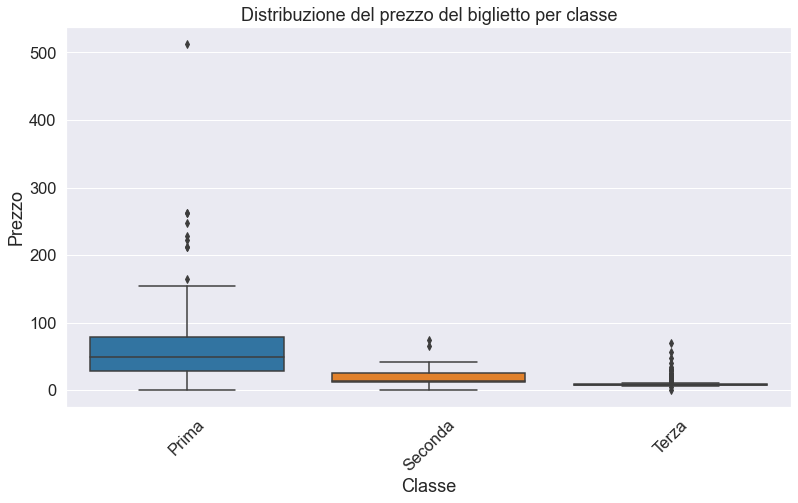

In [59]:
sns.boxplot(x = 'Pclass', y = 'Fare', data = df_unique_ticket)
plt.title('Distribuzione del prezzo del biglietto per classe')
plt.xlabel('Classe')
plt.xticks([0,1,2], ['Prima', 'Seconda', 'Terza'], rotation = 45)
plt.ylabel('Prezzo')
plt.show()

La distribuzione per la seconda e terza classe risulta schiacciata per via della presenza di quella della prima; abbiamo quindi realizzato un grafico separato per la seconda e terza classe:

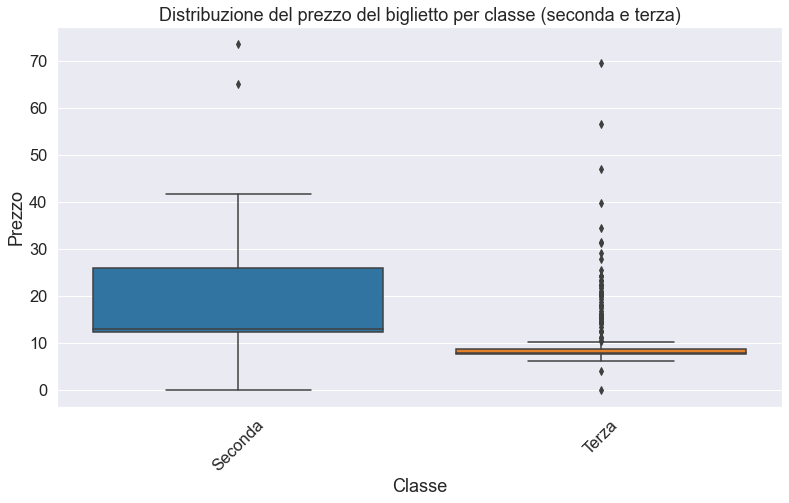

In [60]:
sns.boxplot(x = 'Pclass', y = 'Fare', data = df_unique_ticket[df_unique_ticket['Pclass']!=1])
plt.title('Distribuzione del prezzo del biglietto per classe (seconda e terza)')
plt.xlabel('Classe')
plt.xticks([0,1], ['Seconda', 'Terza'], rotation = 45)
plt.ylabel('Prezzo')
plt.show()

## Distribuzione del prezzo del biglietto per numero di fratelli/sposi <a name='fare_sibsp'></a>

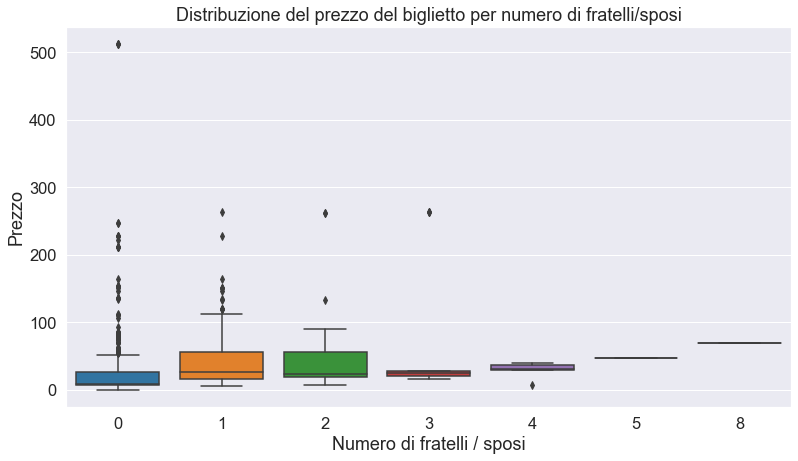

In [61]:
sns.boxplot(x = 'SibSp', y = 'Fare', data = df)
plt.title('Distribuzione del prezzo del biglietto per numero di fratelli/sposi')
plt.xlabel('Numero di fratelli / sposi')
plt.ylabel('Prezzo')
plt.show()

## Distribuzione del prezzo del biglietto per numero di genitori/figli <a name='fare_parch'></a>

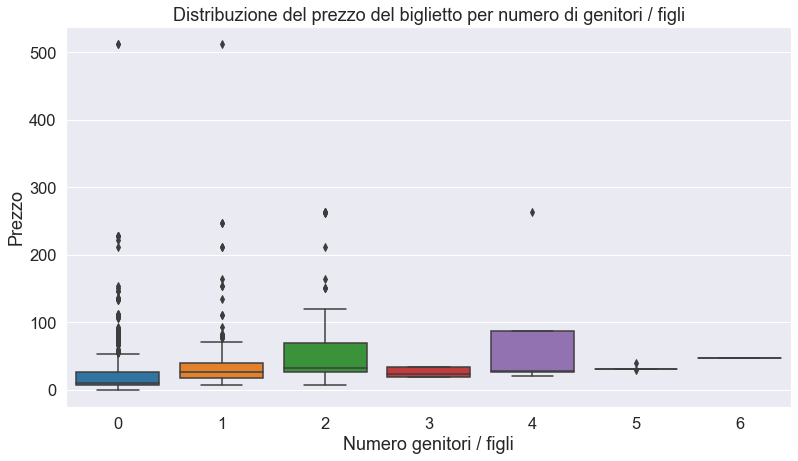

In [62]:
sns.boxplot(x = 'Parch', y = 'Fare', data = df)
plt.title('Distribuzione del prezzo del biglietto per numero di genitori / figli')
plt.xlabel('Numero genitori / figli')
plt.ylabel('Prezzo')
plt.show()

## Numero di persone per cabina in base alla classe <a name='pers_cab'></a>

In [63]:
# prima classe
df_cabina = df[df['Cabin'].notnull()]
df_cabina_1 = df_cabina[df_cabina['Pclass']==1]
print('Il numero di persone con cabina della prima classe era '+str(df_cabina_1.shape[0]))
pers_cab_1 = df_cabina_1.groupby(['Cabin'])['PassengerId']
df_pers_cab_1 = pers_cab_1.aggregate(['count'])

# seconda classe
df_cabina_2 = df_cabina[df_cabina['Pclass']==2]
print('Il numero di persone con cabina della seconda classe era '+str(df_cabina_2.shape[0]))
pers_cab_2 = df_cabina_2.groupby(['Cabin'])['PassengerId']
df_pers_cab_2 = pers_cab_2.aggregate(['count'])

# terza classe
df_cabina = df[df['Cabin'].notnull()]
df_cabina_3 = df_cabina[df_cabina['Pclass']==3]
print('Il numero di persone con cabina della terza classe era '+str(df_cabina_3.shape[0]))
pers_cab_3 = df_cabina_3.groupby(['Cabin'])['PassengerId']
df_pers_cab_3 = pers_cab_3.aggregate(['count'])

Il numero di persone con cabina della prima classe era 176
Il numero di persone con cabina della seconda classe era 16
Il numero di persone con cabina della terza classe era 12


In [64]:
print('La media di persone per cabina della prima classe era '+str(round(df_pers_cab_1.mean()[0],2)))
print('La media di persone per cabina della seconda classe era '+str(round(df_pers_cab_2.mean()[0],2)))
print('La media di persone per cabina della terza classe era '+str(round(df_pers_cab_3.mean()[0],2)))

La media di persone per cabina della prima classe era 1.32
La media di persone per cabina della seconda classe era 2.29
La media di persone per cabina della terza classe era 1.71


# Correlazioni <a name='correlazioni'></a>

## Pulizia del dataset <a name='pulizia'></a>

1. modifica della variabile categorica 'Sex' in valori {0,1} per semplificare la correlazione
2. eliminazione dei valori nulli


In [65]:
# cambiato valori 'Sex': male = 0, female = 1 per calcolo correlazione
df_clean = pd.read_csv('train.csv', encoding = 'utf-8')
df_clean['Sex']=df_clean['Sex'].replace('male',0)
df_clean['Sex']=df_clean['Sex'].replace('female',1)

Esaminati i valori nulli nel dataset

In [66]:
df[df['Survived'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [67]:
df[df['Pclass'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [68]:
df[df['Sex'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [69]:
df[df['SibSp'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [70]:
df[df['Parch'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [71]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [72]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [73]:
# eliminazione valori nulli in variabile 'Age'
df_clean = df_clean[df_clean['Age'].notnull()]
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


## Analisi correlazione <a name='analisi_corr'></a>

1. con pairplot
2. con heatmap

### Pairplot <a name='pairplot'></a>

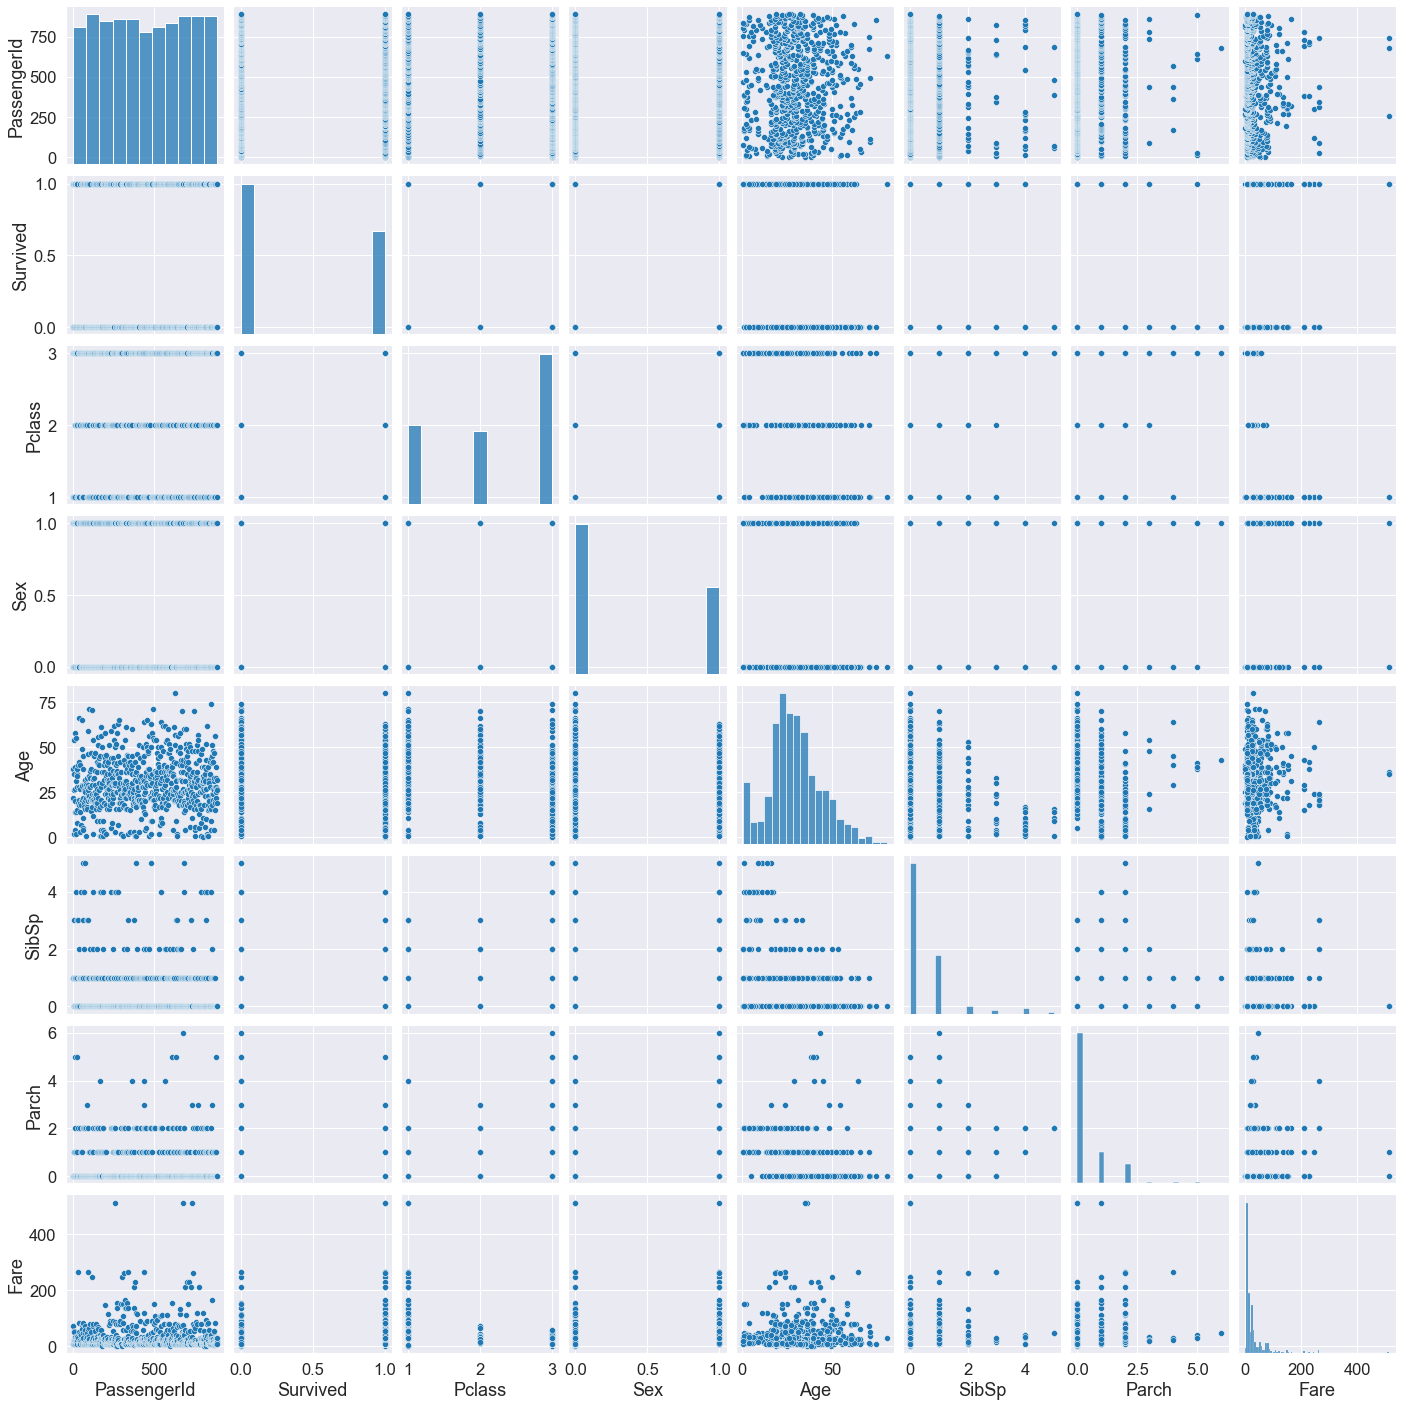

In [74]:
sns.pairplot(df_clean)
plt.show()

### Heatmap <a name='heat'></a>

In [75]:
# eliminazione colonne non rilevanti
df_numeric = df_clean.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
df_numeric

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


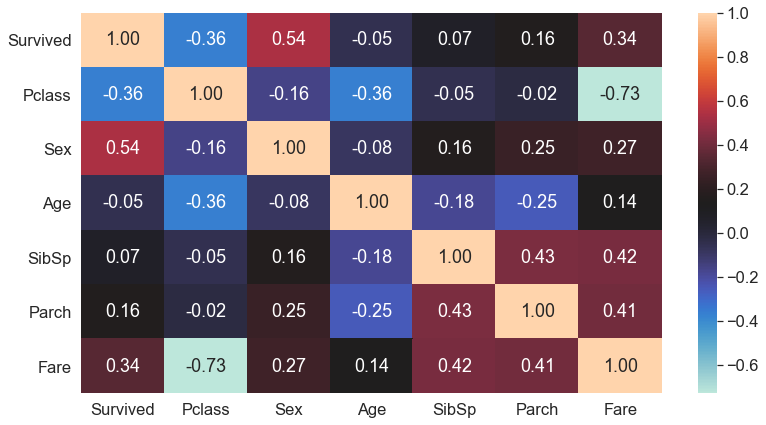

In [76]:
# utilizzo di spearman (distribuzione non normale)
colors = sns.color_palette("icefire", as_cmap=True)
sns.heatmap(df_numeric.corr('spearman'), annot = True, fmt = '.2f', cmap = colors)
plt.show()

+ pclass e fare correlati (-0.73), sono inversamente proporzionali
+ sex e survived correlati (0.54)
+ (minore) sibsp con fare e parch (0.42, 0.43), positivamente
+ (minore) parch e fare (0.41)
+ (minore) pclass e survived (e quindi fare) (-0.36)

In [77]:
df_numeric.corr('spearman')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.360656,0.538826,-0.052565,0.073244,0.156444,0.339027
Pclass,-0.360656,1.000000,-0.159372,-0.361666,-0.050959,-0.018489,-0.730578
Sex,0.538826,-0.159372,1.000000,-0.083330,0.164887,0.254697,0.274996
Age,-0.052565,-0.361666,-0.083330,1.000000,-0.182061,-0.254212,0.135051
SibSp,0.073244,-0.050959,0.164887,-0.182061,1.000000,0.426955,0.422994
Parch,0.156444,-0.018489,0.254697,-0.254212,0.426955,1.000000,0.407150
Fare,0.339027,-0.730578,0.274996,0.135051,0.422994,0.407150,1.000000


## Analisi correlazione con gestione outliers <a name='corr_out'></a>
1. gestione outliers
2. correlazione dataframe senza outliers

### Gestione outliers <a name='outliers'></a>

In [78]:
# calcolo q1 (primo quartile) q3 (terzo quartile e iqr (scarto interquartile)
def get_qant_out (col):
    q1 = col.quantile(0.25, interpolation = 'linear')
    q3 = col.quantile(0.75, interpolation = 'linear')
    iqr = q3-q1
    return (q1, q3, iqr)

In [79]:
# calcolo limite inferiore e superiore outliers
def get_fences(q1, q3, iqr):
    low_fence = q1 - 1.5 * iqr
    up_fence = q3 + 1.5 * iqr
    return (low_fence, up_fence)

Calcolo outliers per Age

In [80]:
age_q1, age_q3, age_iqr = get_qant_out(df_clean['Age'])
print(age_q1, age_q3, age_iqr)

20.125 38.0 17.875


In [81]:
age_low_f, age_up_f = get_fences(age_q1, age_q3, age_iqr)
print(age_low_f, age_up_f)

-6.6875 64.8125


Calcolo outliers di Sibsp

In [82]:
sibsp_q1, sibsp_q3, sibsp_iqr = get_qant_out(df_clean['SibSp'])
print(sibsp_q1, sibsp_q3, sibsp_iqr)

0.0 1.0 1.0


In [83]:
sibsp_low_f, sibsp_up_f = get_fences(sibsp_q1, sibsp_q3, sibsp_iqr)
print(sibsp_low_f, sibsp_up_f)

-1.5 2.5


Calcolo outliers di Parch

In [84]:
parch_q1, parch_q3, parch_iqr = get_qant_out(df_clean['Parch'])
print(parch_q1, parch_q3, parch_iqr)

0.0 1.0 1.0


In [85]:
parch_low_f, parch_up_f = get_fences(parch_q1, parch_q3, parch_iqr)
print(parch_low_f, parch_up_f)

-1.5 2.5


Calcolo outliers di Fare 

In [86]:
fare_q1, fare_q3, fare_iqr = get_qant_out(df_clean['Fare'])
print(fare_q1, fare_q3, fare_iqr)

8.05 33.375 25.325


In [87]:
fare_low_f, fare_up_f = get_fences(fare_q1, fare_q3, fare_iqr)
print(fare_low_f, fare_up_f)

-29.937499999999996 71.3625


Creazione di dataframe con outliers e dataframe con dati senza outliers

In [88]:
# dataframe contenente gli outliers
df_outliers = df_clean.loc[(df_clean['Age'] > age_up_f) | (df_clean['SibSp'] > sibsp_up_f) | (df_clean['Parch'] > parch_up_f) | (df_clean['Fare'] < fare_low_f) | (df_clean['Fare'] > fare_up_f)]
df_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",0,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",0,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",1,8.0,3,1,349909,21.0750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",1,38.0,1,5,347077,31.3875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
851,852,0,3,"Svensson, Mr. Johan",0,74.0,0,0,347060,7.7750,NaN,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",1,45.0,1,1,36928,164.8667,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",1,24.0,0,3,2666,19.2583,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C


In [89]:
# dataframe ripulito da outliers
df_normal = df_clean.loc[(df_clean['Age'] < age_up_f) & (df_clean['SibSp'] < sibsp_up_f) & (df_clean['Parch'] < parch_up_f) & (df_clean['Fare'] > fare_low_f) & (df_clean['Fare'] < fare_up_f)]
df_normal

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",0,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


Analisi descrittiva del dataframe senza outliers

In [90]:
df_normal_num = df_normal.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
df_normal_num.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,0.376554,2.387211,0.321492,29.168295,0.296625,0.250444,18.115452
std,0.484952,0.749363,0.467464,12.828456,0.519142,0.549486,14.390784
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,26.000000
max,1.000000,3.000000,1.000000,64.000000,2.000000,2.000000,71.283300


### Correlazione omettendo gli outliers <a name='corr_out1'></a>

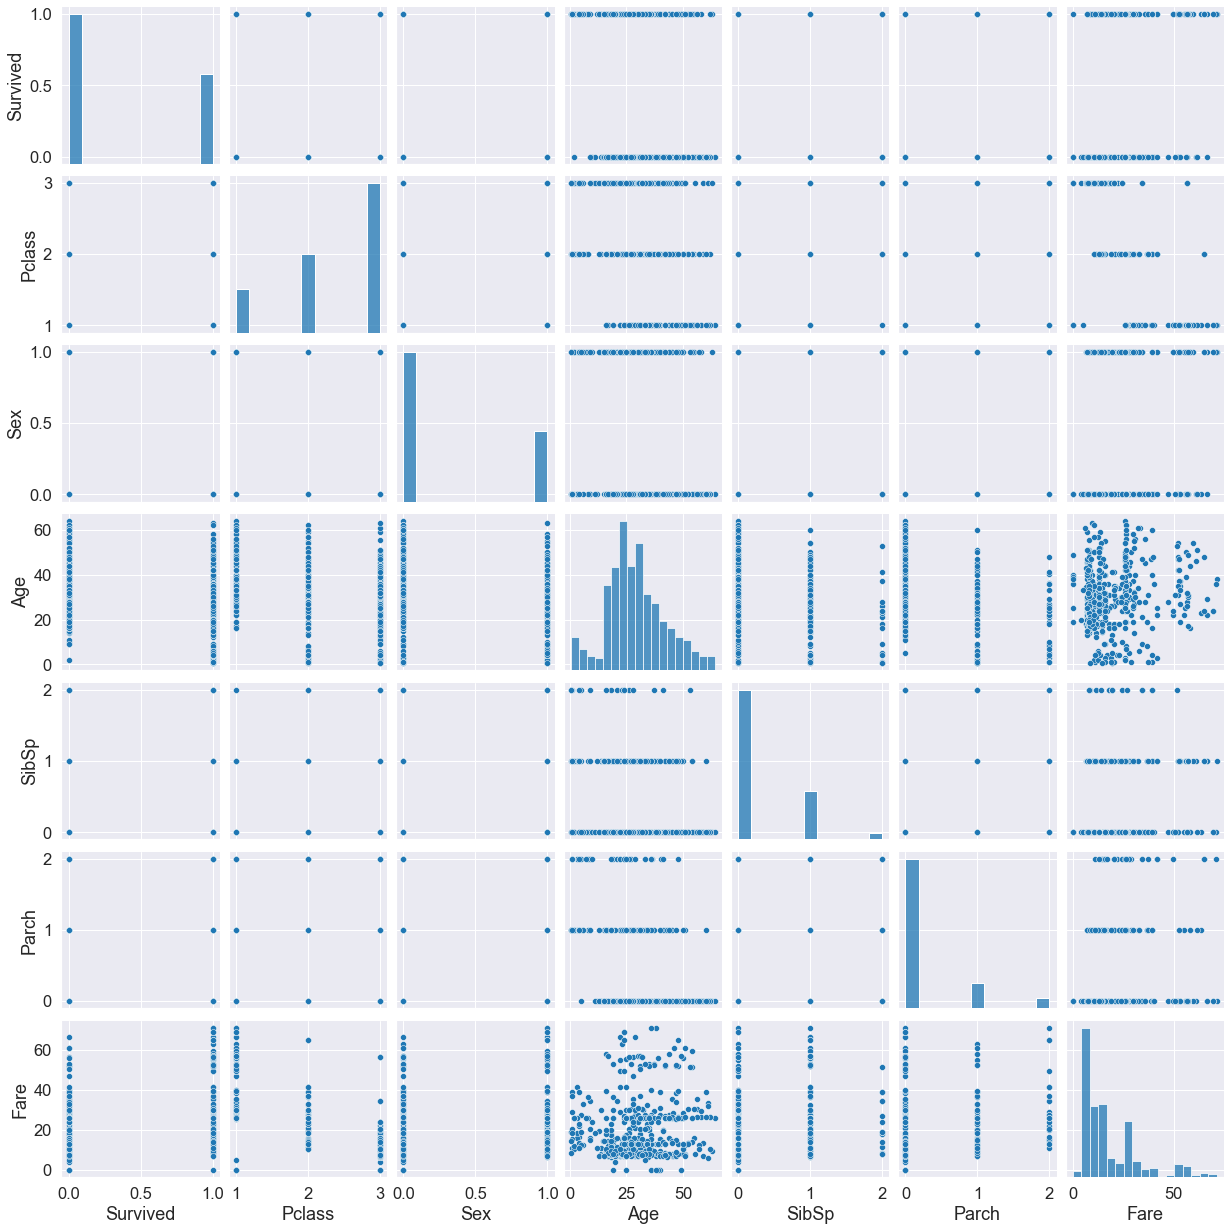

In [91]:
sns.pairplot(df_normal_num)
plt.show()

#### Confronto tra scatterplot Age/Fare con e senza outliers

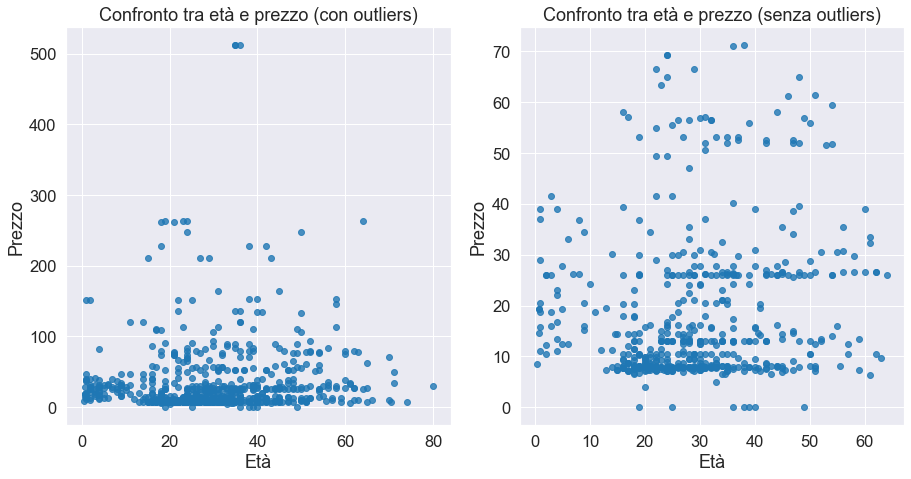

In [102]:
plt.subplot(1,2,1)
sns.regplot(x = 'Age', y="Fare", data = df, fit_reg = False)
plt.title('Confronto tra età e prezzo (con outliers)')
plt.ylabel('Prezzo')
plt.xlabel('Età')

plt.subplot(1,2,2)
sns.regplot(x = 'Age', y="Fare", data = df_normal_num, fit_reg = False)
plt.title('Confronto tra età e prezzo (senza outliers)')
plt.ylabel('Prezzo')
plt.xlabel('Età')

plt.tight_layout()
plt.show()

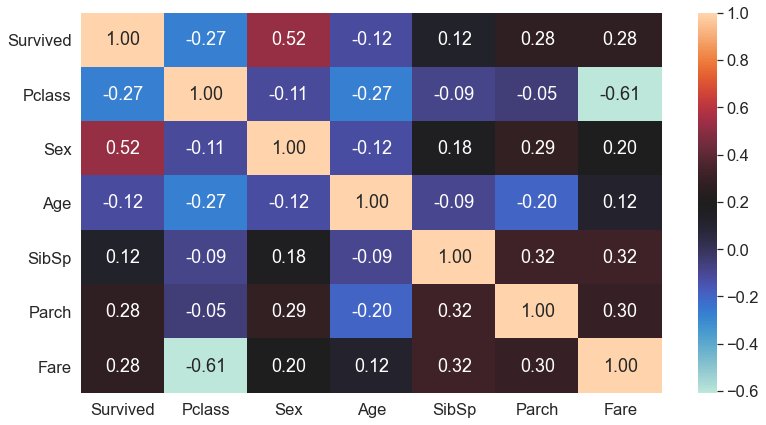

In [92]:
# utilizzo di kendall (meno robusto agli outliers)
colors = sns.color_palette("icefire", as_cmap=True)
sns.heatmap(df_normal_num.corr('kendall'), annot = True, fmt = '.2f', cmap = colors)
plt.show()

'Pclass' & 'Fare' e 'Sex' & 'Survived'rimangono correlati  in modo evidente, come si vedeva anche con Spearman

In [93]:
df_normal_num.corr('kendall')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.268688,0.524658,-0.115726,0.123865,0.275031,0.275749
Pclass,-0.268688,1.000000,-0.106964,-0.269852,-0.086851,-0.054361,-0.609579
Sex,0.524658,-0.106964,1.000000,-0.123306,0.178206,0.288540,0.195833
Age,-0.115726,-0.269852,-0.123306,1.000000,-0.087962,-0.199234,0.116618
SibSp,0.123865,-0.086851,0.178206,-0.087962,1.000000,0.323914,0.321611
Parch,0.275031,-0.054361,0.288540,-0.199234,0.323914,1.000000,0.300049
Fare,0.275749,-0.609579,0.195833,0.116618,0.321611,0.300049,1.000000


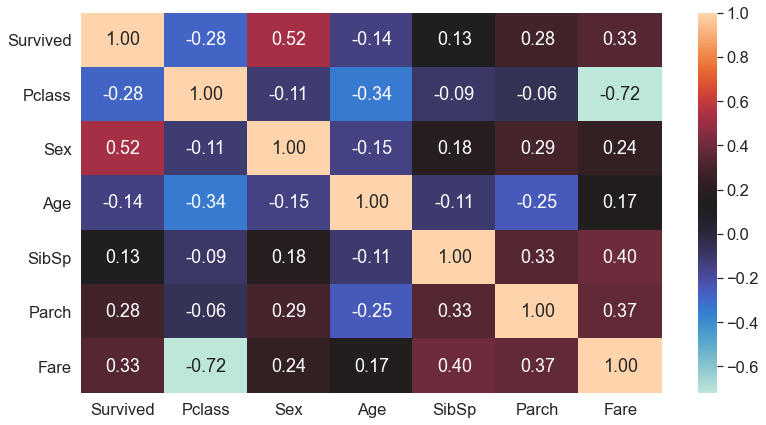

In [94]:
# utilizzo di spearman per confronto con i risultati del dataset non ripulito
colors = sns.color_palette("icefire", as_cmap=True)
sns.heatmap(df_normal_num.corr('spearman'), annot = True, fmt = '.2f', cmap = colors)
plt.show()

+ pclass e fare correlati (da -0.73 a -0.72), sono inversamente proporzionali
+ sex e survived correlati (da 0.54 a 0.52)
+ (minore) sibsp con fare e parch (da 0.42, 0.43 a 0.40, 0.33), positivamente
+ (minore) parch e fare (da 0.41 a 0.37)
+ (minore) pclass e survived (e quindi fare) (da 0.36 a -0.28)

In [95]:
df_normal_num.corr('spearman')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.281235,0.524658,-0.140026,0.125497,0.280447,0.334319
Pclass,-0.281235,1.000000,-0.111959,-0.340208,-0.092443,-0.057987,-0.721593
Sex,0.524658,-0.111959,1.000000,-0.149197,0.180553,0.294222,0.237429
Age,-0.140026,-0.340208,-0.149197,1.000000,-0.107720,-0.246751,0.171803
SibSp,0.125497,-0.092443,0.180553,-0.107720,1.000000,0.334369,0.396724
Parch,0.280447,-0.057987,0.294222,-0.246751,0.334369,1.000000,0.368024
Fare,0.334319,-0.721593,0.237429,0.171803,0.396724,0.368024,1.000000


## Distribuzione di fratelli/sposi per genitori/figli <a name='sibsp_parch'></a>

In base a quanto osservato con la correlazione, abbiamo analizzato i dati delle colonne SibSp e Parch in forma di grafico.

In [96]:
df_sibsp_parch = pd.crosstab(df['SibSp'], df['Parch'], values = df['SibSp'], aggfunc = lambda x: len(x))
df_sibsp_parch

Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,537.0,38.0,29.0,1.0,1.0,2.0,NaN
1,123.0,57.0,19.0,3.0,3.0,3.0,1.0
2,16.0,7.0,4.0,1.0,NaN,NaN,NaN
3,2.0,7.0,7.0,NaN,NaN,NaN,NaN
4,NaN,9.0,9.0,NaN,NaN,NaN,NaN
5,NaN,NaN,5.0,NaN,NaN,NaN,NaN
8,NaN,NaN,7.0,NaN,NaN,NaN,NaN


Il grafico è poco informativo, ma si può vedere una lieve correlazione tra le due variabili, osservando in particolare i primi valori per i parametri.

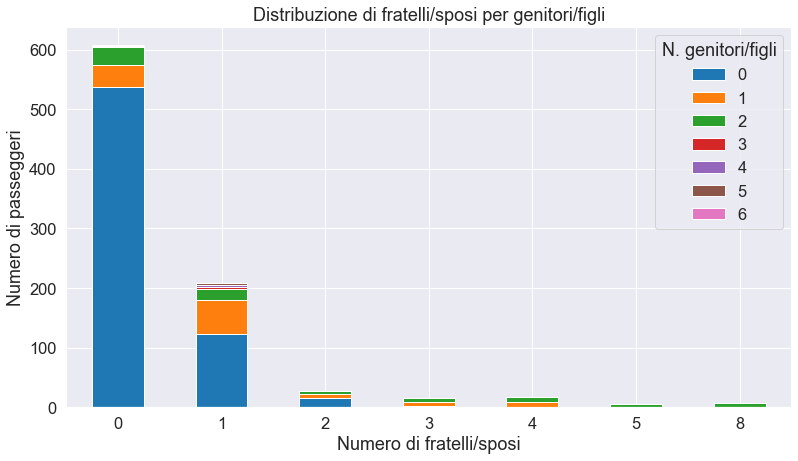

In [97]:
df_sibsp_parch.plot(kind="bar", stacked=True)
plt.title('Distribuzione di fratelli/sposi per genitori/figli')
plt.xlabel('Numero di fratelli/sposi')
plt.ylabel('Numero di passeggeri')
plt.legend().set_title('N. genitori/figli')
plt.xticks(rotation = 0)
plt.show()

## Analisi di correlazione tra classe e sopravvissuti includendo valori nulli per 'Age' <a name='class_surv_corr'></a>

In [126]:
df_class_survived = df.drop(['PassengerId','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis = 1)
df_class_survived.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [127]:
df_class_survived.corr('spearman')

,Survived,Pclass
Survived,1.000000,-0.339668
Pclass,-0.339668,1.000000
